![example](images/director_shot.jpeg)

# A Vision for Microsoft Tenné 

**Authors:** Rebecca Frost-Brewer
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import the data from The Movie Database
tmdb_movies = pd.read_csv("data/zippedData/tmdb.movies.csv.gz", index_col = 0)
# here we specify the index column otherwise we'd have a duplicated index column

# Import the data from IMDb
imdb_title_basics = pd.read_csv("data/zippedData/imdb.title.basics.csv.gz")
imdb_title_ratings = pd.read_csv("data/zippedData/imdb.title.ratings.csv.gz")

# Import the Box Office Mojo data on the gross earnings of movies
movie_gross = pd.read_csv("data/zippedData/bom.movie_gross.csv.gz")

# Join the two IMDb files into one dataframe
imdbreviews = imdb_title_basics.join(imdb_title_ratings.set_index('tconst'),
                                   how = 'inner', on = 'tconst', rsuffix = 'r')

imdbreviews = imdbreviews.drop(columns = ['original_title', 'runtime_minutes', 'numvotes'])
# Based on the documentation from IMDb, the primary title is the more popular title,
# used by the filmmakers on promotional materials whereas the original title is the original title,
# in its original language. I decided to drop the original title since we'll be more familiar with
# the primary title

imdbreviews.rename(columns = {'primary_title':'title'}, inplace = True)
# Change the column name of the movie title to 'title', which will match our additional files

In [3]:
imdbreviws = imdbreviews.dropna(inplace = True)
imdbreviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 146134
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73052 non-null  object 
 1   title          73052 non-null  object 
 2   start_year     73052 non-null  int64  
 3   genres         73052 non-null  object 
 4   averagerating  73052 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [4]:
# From The Movie Database dataframe, we only want the movie title and the vote average.
tmdb_movies = tmdb_movies[['title', 'vote_average']]
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         26517 non-null  object 
 1   vote_average  26517 non-null  float64
dtypes: float64(1), object(1)
memory usage: 621.5+ KB


In [5]:
# From Box Office Mojo, we only want to keep the title and domestic gross earnings for the films
movie_gross = movie_gross[['title', 'domestic_gross']]

In [6]:
movie_gross['gross_mil'] = (movie_gross['domestic_gross'])/1000000

In [7]:
movie_gross = movie_gross[['title', 'gross_mil']]
movie_gross.dropna(inplace = True)
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      3359 non-null   object 
 1   gross_mil  3359 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.7+ KB


In [ ]:
imdbreviews.head()

In [ ]:
tmdb_movies.head()

In [ ]:
movie_gross.head()

In [10]:
moviedf = imdbreviews.merge(tmdb_movies, on = 'title').merge(movie_gross, on = 'title')
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         3259 non-null   object 
 1   title          3259 non-null   object 
 2   start_year     3259 non-null   int64  
 3   genres         3259 non-null   object 
 4   averagerating  3259 non-null   float64
 5   vote_average   3259 non-null   float64
 6   gross_mil      3259 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 203.7+ KB


In [11]:
moviedf.head()

,tconst,title,start_year,genres,averagerating,vote_average,gross_mil
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,6.6,1.100
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,5.6,0.744
2,tt4339118,On the Road,2014,Drama,6.0,5.6,0.744
3,tt5647250,On the Road,2016,Drama,5.7,5.6,0.744
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,7.1,58.200


In [15]:
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         3259 non-null   object 
 1   title          3259 non-null   object 
 2   start_year     3259 non-null   int64  
 3   genres         3259 non-null   object 
 4   averagerating  3259 non-null   float64
 5   vote_average   3259 non-null   float64
 6   gross_mil      3259 non-null   float64
 7   ratingave      0 non-null      float64
dtypes: float64(4), int64(1), object(3)
memory usage: 229.1+ KB


In [16]:
moviedf['ratingave'] = (moviedf["averagerating"] + moviedf["vote_average"])/2
moviedf.head()

,tconst,title,start_year,genres,averagerating,vote_average,gross_mil,ratingave
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,6.6,1.100,6.85
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,5.6,0.744,5.85
2,tt4339118,On the Road,2014,Drama,6.0,5.6,0.744,5.80
3,tt5647250,On the Road,2016,Drama,5.7,5.6,0.744,5.65
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,7.1,58.200,7.20


In [68]:
moviedf_small = moviedf_small.drop(columns = ['averagerating', 'vote_average'])

In [69]:
moviedf_small = moviedf[(moviedf['ratingave'] >= 7) &
                        (moviedf['gross_mil'] >= 3)]
moviedf_small

,tconst,title,start_year,genres,averagerating,vote_average,gross_mil,ratingave
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,7.1,58.2,7.20
9,tt3079380,Spy,2015,"Action,Comedy,Crime",7.0,7.0,110.8,7.00
15,tt0398286,Tangled,2010,"Adventure,Animation,Comedy",7.8,7.5,200.8,7.65
31,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,7.7,415.0,8.00
32,tt0443272,Lincoln,2012,"Biography,Drama,History",7.4,6.8,182.2,7.10
...,...,...,...,...,...,...,...,...
3249,tt7745068,My Hero Academia: Two Heroes,2018,"Action,Adventure,Animation",7.8,8.3,5.8,8.05
3250,tt7775622,Free Solo,2018,"Documentary,Sport",8.2,8.0,17.5,8.10
3251,tt7784604,Hereditary,2018,"Drama,Horror,Mystery",7.3,7.0,44.1,7.15
3252,tt7905466,They Shall Not Grow Old,2018,"Documentary,History,War",8.4,8.1,18.0,8.25


In [20]:
# We want to split the genre column for analysis, so that each genre is on its own
moviedf_small = moviedf_small.assign(genres = moviedf_small['genres'].str.split(',')).explode('genres')
moviedf_small.head()

,tconst,title,start_year,genres,averagerating,vote_average,gross_mil,ratingave
4,tt0359950,The Secret Life of Walter Mitty,2013,Adventure,7.3,7.1,58.2,7.2
4,tt0359950,The Secret Life of Walter Mitty,2013,Comedy,7.3,7.1,58.2,7.2
4,tt0359950,The Secret Life of Walter Mitty,2013,Drama,7.3,7.1,58.2,7.2
9,tt3079380,Spy,2015,Action,7.0,7.0,110.8,7.0
9,tt3079380,Spy,2015,Comedy,7.0,7.0,110.8,7.0


In [24]:
moviedf_small['genres'].unique()

array(['Adventure', 'Comedy', 'Drama', 'Action', 'Crime', 'Animation',
       'Biography', 'History', 'Fantasy', 'Documentary', 'Sport',
       'Thriller', 'Mystery', 'Sci-Fi', 'Romance', 'War', 'Family',
       'Music', 'Horror', 'Western', 'Musical'], dtype=object)

In [25]:
len(moviedf_small['genres'].unique())

21

In [26]:
topratings_genre = (pd.DataFrame(moviedf_small.groupby('genres').title.nunique())).sort_values(
    'title', ascending = False)

topratings_genre

,title
genres,
Drama,250
Comedy,102
Adventure,90
Action,79
Biography,77
Crime,54
Thriller,51
Romance,46
Documentary,37


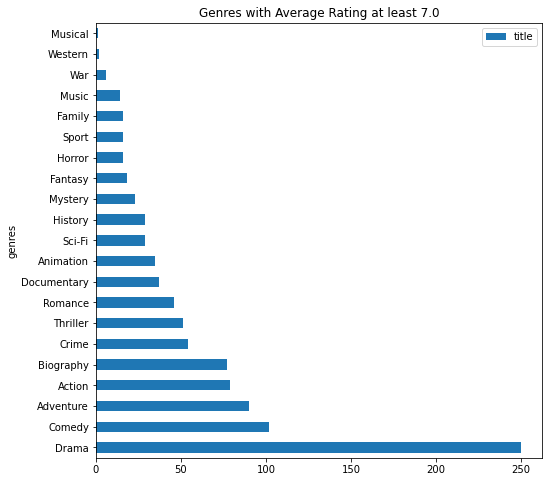

In [27]:
topratings_genre[['title']].plot.barh(
    stacked = True, title = 'Genres with Average Rating at least 7.0', figsize=(8, 8));

In [38]:
genre_ratings = moviedf_small.groupby('genres').ratingave.agg(['count','mean']).sort_values(
    'mean', ascending = False)
genre_ratings[genre_ratings['count'] >= 5]

,count,mean
genres,,
Music,16,7.687500
Sci-Fi,33,7.610606
Animation,44,7.522727
Mystery,28,7.512500
Adventure,104,7.512019
Documentary,41,7.492683
Biography,95,7.484211
Action,91,7.483516
Crime,66,7.481061


In [59]:
topratings_gross = moviedf_small[['title', 'genres', 'gross_mil']]
topratings_gross = topratings_gross.groupby(['genres']).mean()
topratings_gross.sort_values('gross_mil', ascending = False, inplace = True)

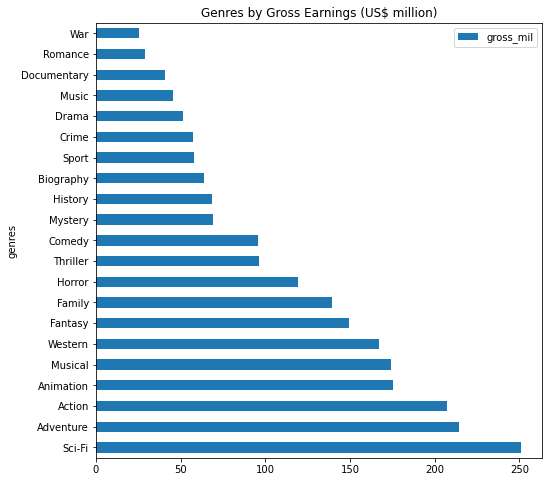

In [60]:
topratings_gross[['gross_mil']].plot.barh(stacked = True,
                                          title = 'Genres by Gross Earnings (US$ million)',
                                          figsize=(8, 8));

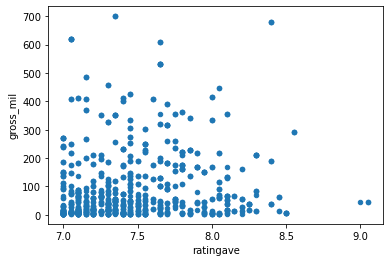

In [64]:
moviedf_small.plot(kind = 'scatter', x = 'ratingave', y = 'gross_mil');

In [65]:
moviedf_small.corr()

,start_year,averagerating,vote_average,gross_mil,ratingave
start_year,1.000000,0.018629,0.150088,0.094231,0.130957
averagerating,0.018629,1.000000,-0.042627,0.143169,0.610765
vote_average,0.150088,-0.042627,1.000000,-0.003326,0.765057
gross_mil,0.094231,0.143169,-0.003326,1.000000,0.089643
ratingave,0.130957,0.610765,0.765057,0.089643,1.000000


There is a very weak, positive correlation between rating average and gross earnings, with a correlation coefficient of 0.0896

This is a weak, positive correlation rating average and year of movie release, 0.131

In [ ]:
import code.data_preparation as dp

In [ ]:
# Import the visualization package you created

import code.visualizations as viz

In [ ]:
# This example function takes no arguments currently, but you would pass the full dataset to it for your project

viz.sample_plot_1()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# here you run your code to clean the data
import code.data_cleaning as dc

full_dataset = dc.full_clean()

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***